# Videogames Profitability Study

-----

## Overview

### Description


<div style="color: #196CC4;"> Ice Online Store is a global retailer specializing in video game sales. This project uses data available from open sources, such as user and expert reviews, game genres, platforms (such as Xbox and PlayStation), and historical sales data. </div>

### Objective

<div style="color: #196CC4;">
Identify patterns that predict whether a video game will be successful. Based on the detection of promising projects, the insights gained will be used to strategically plan an advertising campaign aimed at 2017.
</div>

### Resources

<div style="color: #196CC4;"> Data available up to 2016. In December 2016, planning for a 2017 campaign begins.<br>
▶ Name<br> ▶ Platform<br> ▶ Year_of_Release<br> ▶ Genre<br> ▶ NA_sales (sales in North America in millions of USD)<br> ▶ EU_sales (sales in Europe in millions of USD)<br> ▶ JP_sales (sales in Japan in millions of USD)<br> ▶ Other_sales (sales in other countries in millions of USD)<br> ▶ Critic_Score (maximum of 100)<br> ▶ User_Score (maximum of 10)<br> ▶ Rating (ESRB)*<br><br>

*The Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating such as Teen or Adult.

</div>

### Methodology

<div style="color: #196CC4;">
<ol>
<li>Data Initialization and Exploration
<ul>
<li>Import necessary libraries, modules, and the "games.csv" dataset.</li>
<li>Explore the dataset, identifying initial correlations, missing values, duplicates, and syntax anomalies.</li>
<li>Clean the dataset by standardizing column names, handling missing values, and ensuring data types are appropriate.</li>
</ul>
</li>
<li>Video Game Sales Analysis
<ul>
<li>Calculate descriptive statistics for the dataset.</li>
<li>Determine the range of years covered by the data.</li>
<li>Analyze total sales by geographic region.</li>
<li>Study the evolution of the number of game releases over time.</li>
<li>Identify the ranking of platforms by sales.</li>
<li>Analyze trends and popularity of different platforms.</li>
<li>Calculate variance and standard deviation of sales per platform.</li>
<li>Visualize the global distribution of sales by platform.</li>
<li>Evaluate the influence of reviews on PS4 sales.</li>
<li>Analyze the distribution and profitability of games by genre.</li>
<li>Identify genres with the highest market share in each region.</li>
<li>Rank market shares by rating and region.</li>
</ul>
</li>
<li>Hypothesis Testing
<ul>
<li>Conduct T-tests to compare ratings between platforms.</li>
<li>Conduct T-tests to compare ratings between genres.</li>
</ul>
</li>
<li>Conclusions</li>
</ol>
</div>

-----

## General Information

### Inicialization

<div style="color: #196CC4;">
▶ Import of libraries and data loading
</div>


In [1]:
# Loading modules and libraries.

# statistical functions and distributions.
from scipy import stats as st  

# multidimensional arrays, mathematical functions, and linear algebra operations.
import numpy as np 

# data structures and tools for data analysis.
import pandas as pd

# plots and visualizations.
from matplotlib import pyplot as plt

# data visualization library based on Matplotlib.
import seaborn as sns 

# statistical functions and distributions.
from scipy import stats

In [2]:
#Loading dataset
games = pd.read_csv('datasets/games.csv')

### Datasets general overview


<div style="color: #196CC4;">
▶ Dataframes general properties
</div>

In [3]:
# General information about this DataFrame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Display DataFrame information
display(games) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style="color: #196CC4;">
<b>Below are the initial observations:</b><br>
▶ Variable names are in uppercase, and for consistency, it is better to have them all in lowercase.<br>
▶ There are missing values in several columns: Name, Year_of_Release, Genre, User_Score, Critic_Score, Rating.<br>
▶ Some columns have incorrect data types: Year_of_Release, User_Score.
</div>

-----

## Exploratory Data Analysis (EDA)

### Consistency in Series

<div style="color: #196CC4;">
▶ Next, column names are converted to lowercase for consistency, which helps facilitate data handling.
</div>

In [5]:
#Series names in lowercase
games.columns = games.columns.str.lower()

# Display DataFrame information
display(games.head(5)) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Data Cleaning

<div style="color: #196CC4;">
    <b>Column 'user_score' and 'tbd' value:</b><br>
▶ The column should be of float type and not text (object) as it contains decimal values. However, many video games have the value 'tbd' (to be defined), which is a text string. <br>
▶ Converting this data type to float is necessary for performing mathematical calculations later on, which can enhance the analysis. Ultimately, ratings should influence the patterns that determine whether a game is successful or not.<br>
▶ Next, replace 'tbd' values with NaN to convert the column to float type.
</div>

In [6]:
# Replace tbd values with NaN and change of data type in user_score series
games["user_score"] = games["user_score"].replace("tbd",np.nan).astype(float)

<div style="color: #196CC4;">
    <b>Column 'rating':</b><br>
▶ This column is of text (object) type. Replace missing values (NaN) with 'Not defined' to provide a more user-friendly label for identifying games that were not categorized.
</div>

In [7]:
# Fill of NaN values in rating
games['rating'] = games['rating'].fillna('Not defined')

<div style="color: #196CC4;">
    <b>Columns 'name' and 'genre':</b><br>
▶ Initial properties of the DataFrame identify only two missing values (NaN) in these two series.<br>
▶ These missing values are observed to coincide in the same games and lack information in ratings and ratings.<br>
▶ Since there are only two games in a representative sample of data, removing them from the DataFrame will not affect subsequent analysis, and they do not add value with multiple missing values in these rows.
</div>

In [8]:
# Display of 2 missing games definition
print()
missing_games = games.loc[games['name'].isna()]
print('There are 2 games without name, genre, or rating definition:')

display(missing_games)

# Delete games with 'NaN' on name and genre
games.dropna(subset=['name'], inplace=True)


There are 2 games without name, genre, or rating definition:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Not defined
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Not defined


### Display of datasets


<div style="color: #196CC4;">
▶ Next, the changes made to the DataFrame properties and its preview are verified.<br>
▶ There are still missing values in 'user_score', but since there are too many, it will be important to keep them as is to avoid affecting the subsequent analysis.
</div>

In [9]:
# General DataFrame properties
print()
print('Clean DataFrame properties:')

print()
games.info()


Clean DataFrame properties:

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [10]:
# DataFrame information
print()
print('DataFrame preview:')

display(games)


DataFrame preview:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not defined
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not defined
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not defined
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not defined
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not defined
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not defined


<div style="color: #196CC4;">
▶ The following shows the range of years that will be analyzed throughout this project: from 1980 to 2016.
</div>


In [11]:
# Getting range of years within the dataset
min_year = games[games['year_of_release'] != 0]['year_of_release'].min()
max_year = games['year_of_release'].max()

print('The dataset contains video game data from the year',
      min_year, 'to', max_year, '.')

The dataset contains video game data from the year 1980.0 to 2016.0 .


### Feature Engineering

<div style="color: #196CC4;">
▶ There are several columns with sales data by geographic area (North America, Europe, Japan, and others). Sales are also a factor influencing a game's success.<br>
▶ The sales from all regions are summed and concentrated into a new column 'total_sales'; this will likely help later in the analysis.
</div>


In [12]:
# Creación de nueva columna con ventas totales
print()
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print('New column with total sales sum for each game:')

display(games)


New column with total sales sum for each game:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not defined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not defined,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not defined,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not defined,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not defined,0.01


-----

## Data Analysis

### Games Released by Year

<div style="color: #196CC4;">
▶ The following shows information related to the release of video games by year.
</div>

In [13]:
# Counting of game releases per year
total_games_year = games[games['year_of_release'] != 0]
total_games_year = total_games_year['year_of_release'].value_counts().sort_index()

# Display data
print("Video games released by year:")
display(total_games_year.head())

Video games released by year:


year_of_release
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: count, dtype: int64

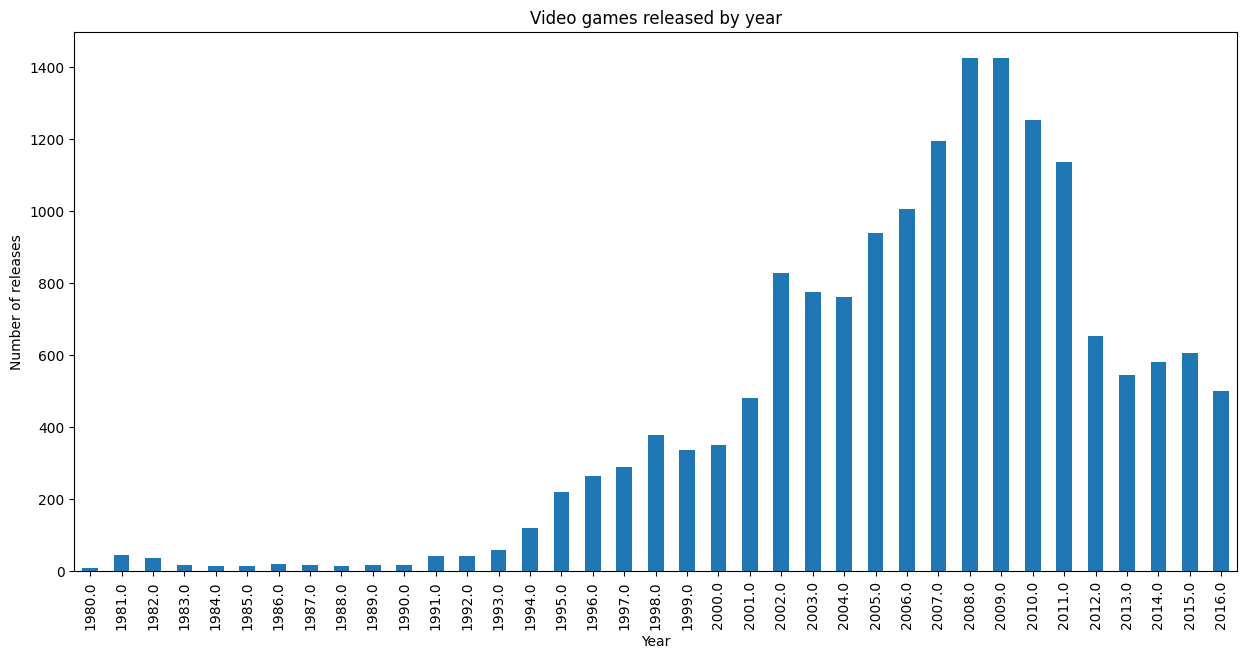

In [14]:
# Bar graph creation
total_games_year.plot(
    x='year_of_release',
    kind='bar',
    title='Video games released by year',
    xlabel='Year',
    ylabel='Number of releases',
    figsize=[15, 7])

plt.show()

<div style="color: #196CC4;">
<b>RESULT ANALYSIS:</b><br>
▶ Birth and gradual growth from 1980 to 2000: During this period, the number of game releases increased gradually, from 9 in 1980 to 350 in 2000.<br>
▶ Exponential growth and consolidation from 2001 to 2011: During this period, there was an exponential increase in the number of releases, peaking in 2008 and 2009 with 1427 and 1426, respectively. This clearly reflects the growing popularity of video games and the industry's consolidation in the market.<br>
▶ Decline and settling from 2012 onward: Since 2012, there has been a significant decrease in the number of releases.<br></div>


### Sales by Platform

<div style="color: #196CC4;">
▶ Below are details on the ranking of video game sales by platform.</div>

In [15]:
# Total platforms
total_platforms = games['platform'].nunique()
print("Total number of platforms:")

print(total_platforms)
print()

# Platforms ranking with top sales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

Total number of platforms:
31



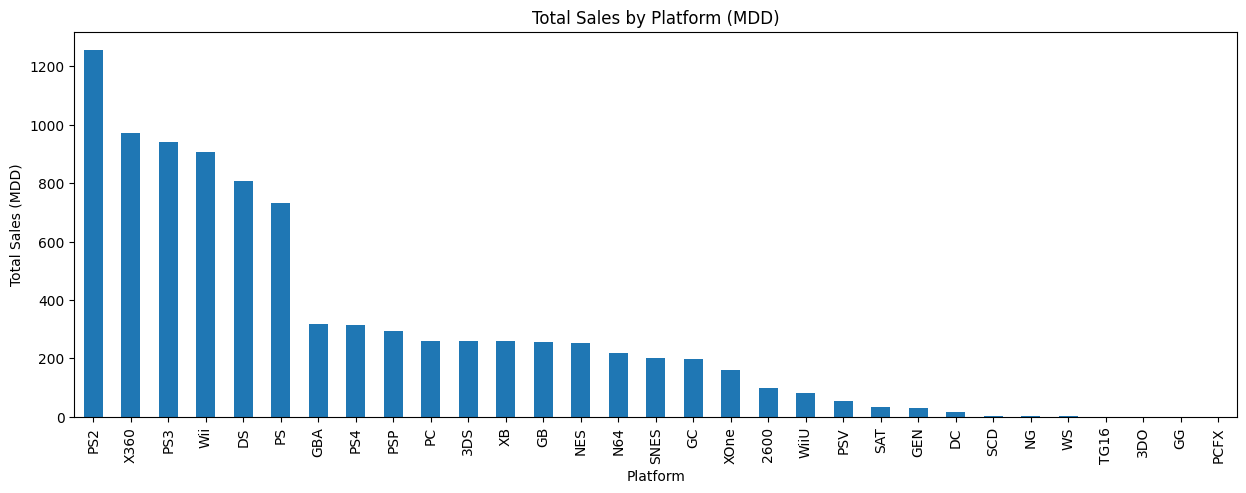

In [16]:
# Bar graph creation
platform_sales.plot(
        x='platform',
        kind='bar',
        stacked=True,
        title='Total Sales by Platform (MDD)',
        xlabel='Platform',
        ylabel='Total Sales (MDD)',
        figsize=[15, 5])

plt.show()


<div style="color: #196CC4;">
<b>RESULTS ANALYSIS: </b><br>
▶ The 6 platforms with the highest sales over the decades have been PS2 followed by X360, PS3, Wii, DS, and PS. Sales for the rest of the platforms are considerably lower compared to the top 6.
</div>


### Platform Trends

<div style="color: #196CC4;">
▶ The following shows trends and popularity of different platforms over the years.
</div>


In [17]:
# Filter of top 8 platform sales
top_platforms = platform_sales.head(8)

print("Top platforms with highest total sales:")

print(top_platforms)

Top platforms with highest total sales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
Name: total_sales, dtype: float64


In [18]:
# Excluding games without year of release
zero_year_filtered = games[games['year_of_release'] != 0]

# Calcular las ventas totales por año y plataforma
platform_sales_by_year = zero_year_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().loc[top_platforms.index, :].sort_index(level='year_of_release')

print()
print("Total sales per year for 'top sales' platforms:")

display(platform_sales_by_year.head(5))                             


Total sales per year for 'top sales' platforms:


platform  year_of_release
DS        1985.0               0.02
PS        1994.0               6.03
          1995.0              35.96
          1996.0              94.70
          1997.0             136.17
Name: total_sales, dtype: float64

In [19]:
# Separate data by year
platform_sales_pivot = platform_sales_by_year.unstack(level=0)
display(platform_sales_pivot.head(5))

platform,DS,PS,GBA,PS2,X360,PS3,Wii,PS4
year_of_release,,,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN


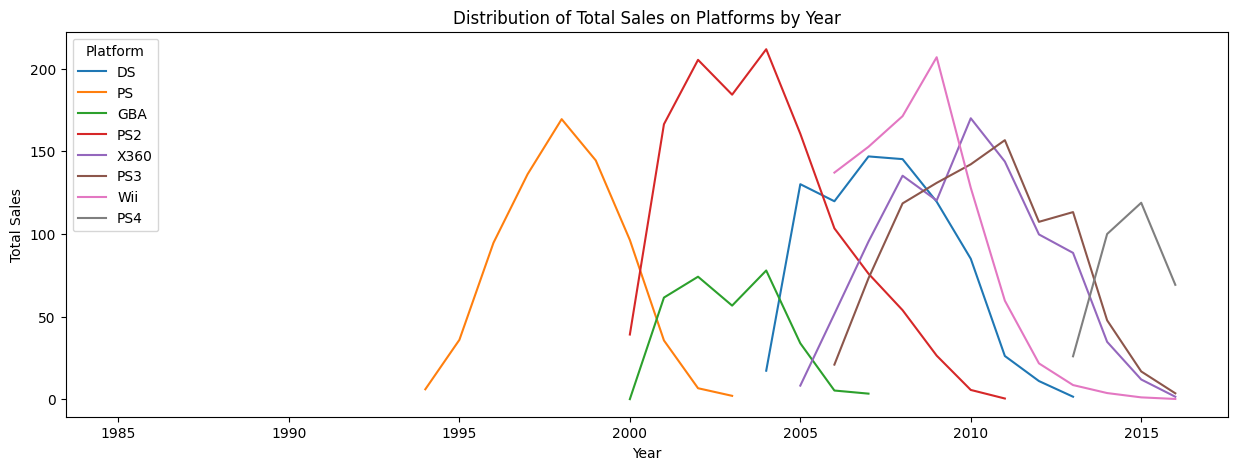

In [20]:
# Lines graph creation
platform_sales_pivot.plot(
    kind='line',
    title='Distribution of Total Sales on Platforms by Year',
    xlabel='Year',
    ylabel='Total Sales',
    figsize=[15, 5]
)
plt.legend(title='Platform')
plt.show()

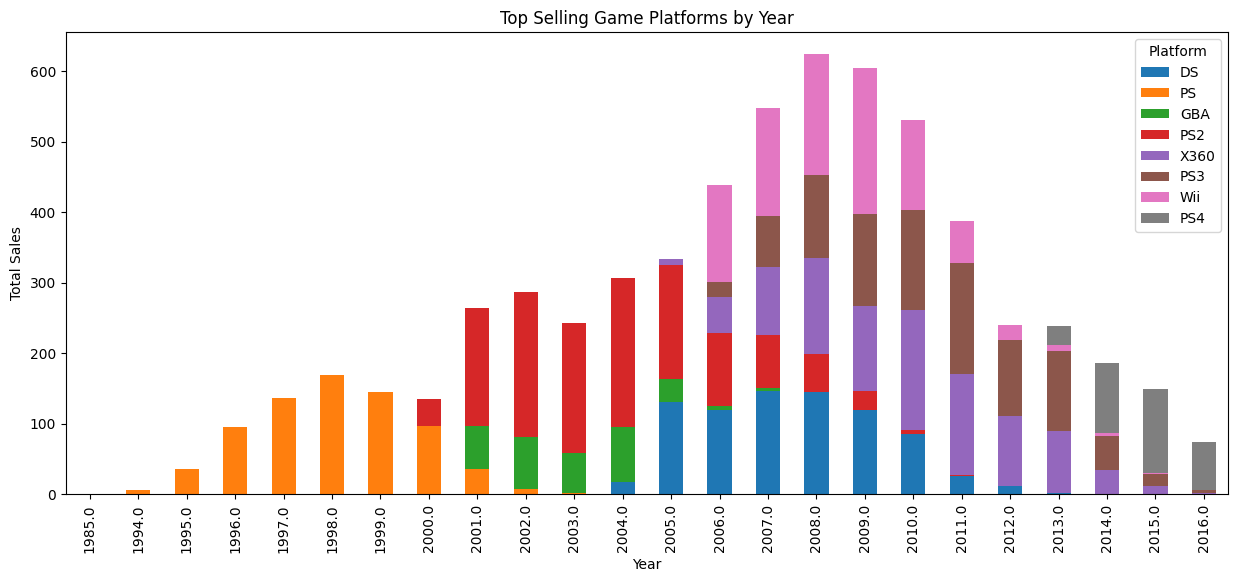

In [21]:
# Bar graph creation
platform_sales_pivot.plot(
    kind='bar',
    stacked=True,
    title='Top Selling Game Platforms by Year',
    xlabel='Year',
    ylabel='Total Sales',
    figsize=[15, 6])

plt.legend(title='Platform')
plt.show()

<div style="color: #196CC4;">
<b>RESULTS ANALYSIS: </b><br>
▶ The following describes a specific analysis of the market popularity of these 6 top-selling platforms from 1994 to 2016:
<ul>
<li><b>PlayStation:</b> The original PS was quite popular from its launch in 1994 until around 2000, when it was replaced by the PS2.</li>
<li><b>PlayStation 2:</b> It was very popular from its launch in 2000 until around 2006, when several new consoles emerged.</li>
<li><b>Nintendo DS:</b> Popular from its launch in 2004 until around 2010, when it began to lose sales.</li>
<li><b>Xbox 360:</b> Popular from its launch in 2005 until around 2013.</li>
<li><b>PlayStation 3:</b> Similar to the Xbox 360, it had good popularity from its launch in 2006 until around 2013.</li>
<li><b>Wii:</b> Recognized from its launch in 2006 until around 2010, when its popularity started to decline.</li>
</ul>
▶ These platforms have in common that from their launch, their popularity grew very quickly and remained stable, or declined very little over the following 5 years. At this point, other consoles/technologies emerged, leading to a radical decrease in sales for these mature platforms.<br>
▶ By 2017 (not visualized in this project's data), it is observed that PS4 has been dominating the market since its launch in 2013 and is likely to remain well-positioned until approximately 2018, following the lifecycle and popularity trends seen with other platforms in previous years.<br>
▶ It is very interesting to observe the lifecycle of platforms, from their birth, exponential growth, and positioning to their decline when a new innovation in the industry is introduced.<br></div>


### Variance and Standard Deviation


In [22]:
# Variance and standard deviation for platforms
varianza_platform = np.var(platform_sales_pivot).sort_values(ascending=False)
desviacion_estandar_platform = np.std(platform_sales_pivot).sort_values(ascending=False)

# Display data
print("Variance:", varianza_platform)
print()
print("Standard Deviation:", desviacion_estandar_platform)

Variance: platform
PS2     5779.830706
Wii     5693.235223
PS      3612.095556
DS      3457.798218
X360    3029.085722
PS3     2713.875874
PS4     1234.316925
GBA      939.538700
dtype: float64

Standard Deviation: platform
PS2     76.025198
Wii     75.453530
PS      60.100712
DS      58.803046
X360    55.037130
PS3     52.094874
PS4     35.132847
GBA     30.651896
dtype: float64


c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<div style="color: #196CC4;">
<b>RESULTS ANALYSIS: </b><br><br>
▶ Variance
    <ul>
        <li>The variance for each platform indicates how much the game sales vary for each one. For example, high variance indicates greater dispersion from the mean, while low variance shows that the data points are closer to the mean.</li>
        <li>PS2, Wii, and PS show more variability in sales.</li>
        <li>GBA, PS4, and PS3 show less variability in sales.</li>
    </ul>
▶ Standard Deviation
    <ul>
        <li>The standard deviation (square root of the variance) for each platform indicates the typical amount of variation in the sales data. For example, if the standard deviation is 20 units, then we would expect most sales to fall within 20 units of the mean.</li>
        <li>Wii, PS2, and PS show more dispersed sales data.</li>
        <li>GBA, PS4, and PS3 indicate less dispersed sales data.</li>
    </ul>
   
</div>


### Data Filtering (2013 - 2016)


<div style="color: #196CC4;">
▶ Next, the data is filtered to include only the last 4 years of information. This information will be used in subsequent analyses.
</div>


In [23]:
# Last 4 years filter
#last_five_years = games['year_of_release'].nlargest(5)
new_games = games[games['year_of_release'] >= 2013] 
#display(new_games)

### Platform Distribution

<div style="color: #196CC4;">
▶ The following displays a box plot for global sales of all games, broken down by platform (the second plot zooms in on the body of the boxes).
</div>


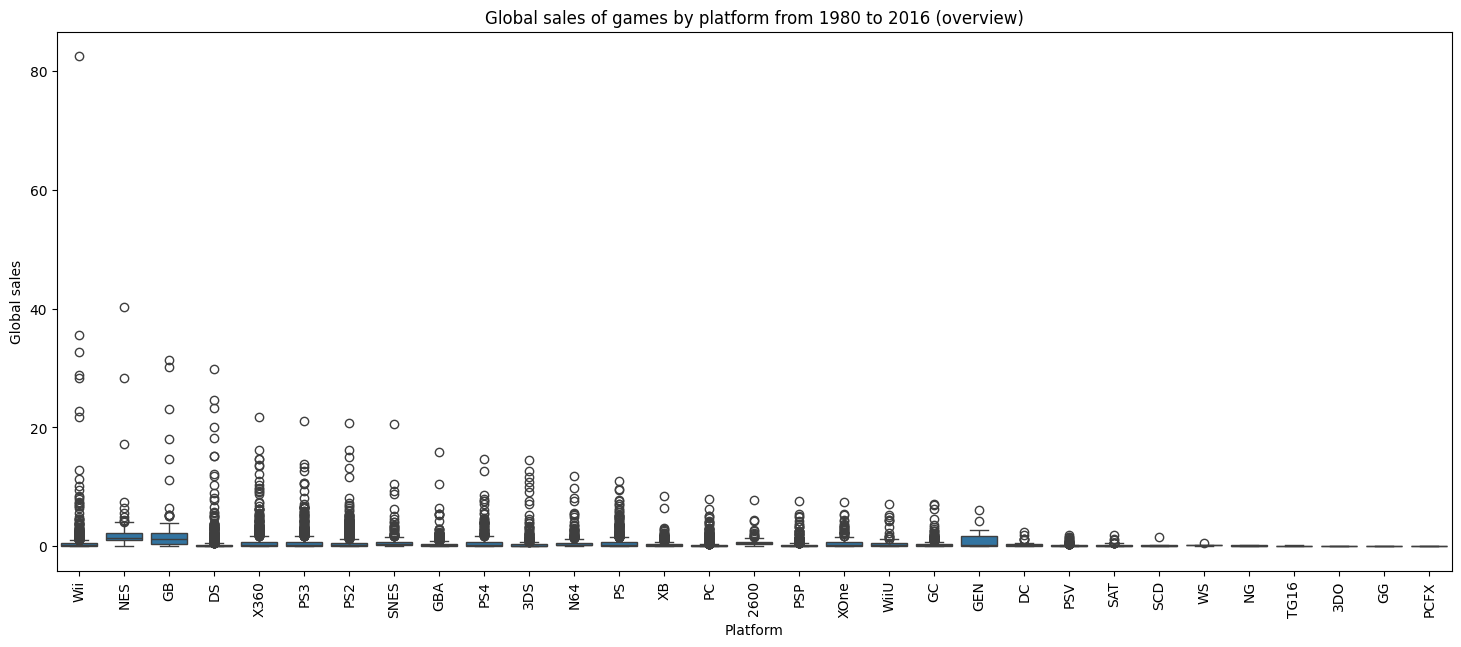

In [24]:
# Setting up the box plot
plt.figure(figsize=(18, 7))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Global sales of games by platform from 1980 to 2016 (overview)')
plt.xlabel('Platform')
plt.ylabel('Global sales')
plt.xticks(rotation=90)
plt.show()

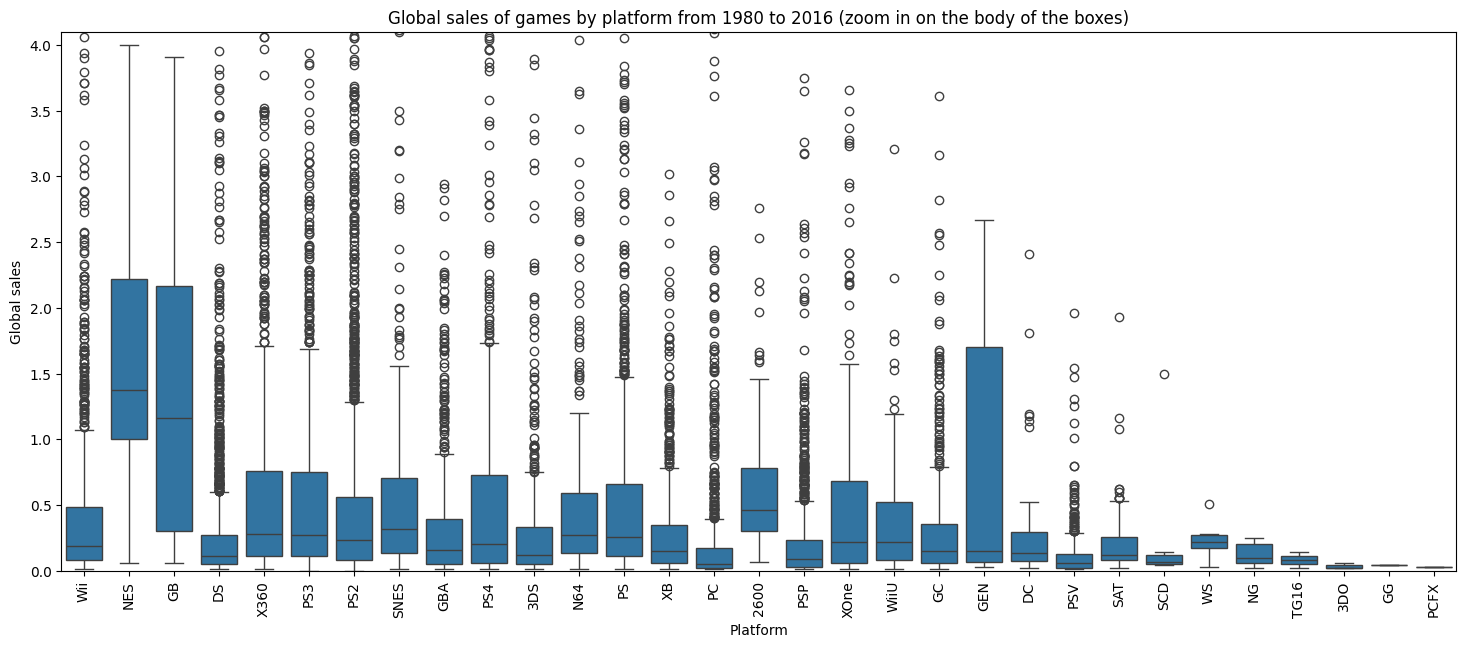

In [25]:
# Zoom in graph
# Setting up the box plot
plt.figure(figsize=(18, 7))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Global sales of games by platform from 1980 to 2016 (zoom in on the body of the boxes)')
plt.xlabel('Platform')
plt.ylabel('Global sales')
plt.xticks(rotation=90)
plt.ylim(0, 4.1)  # Visualization limited to 0 to 4
plt.show()

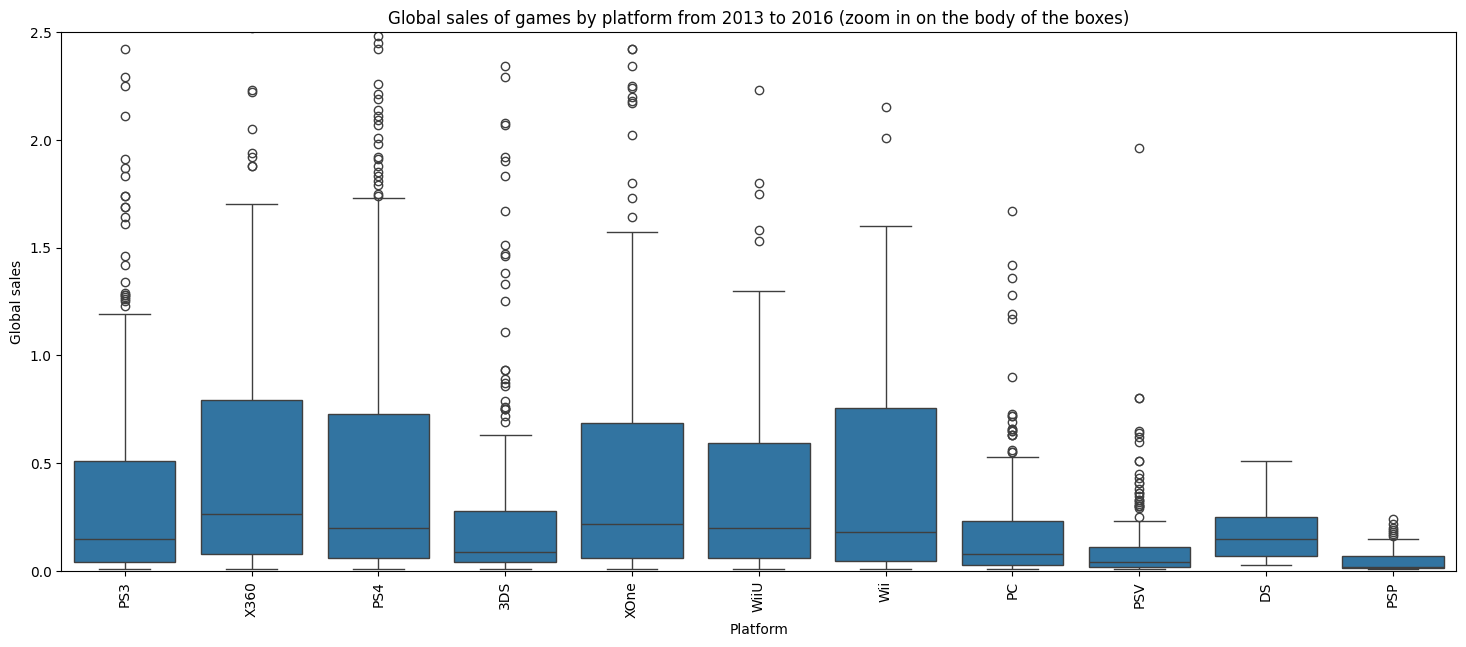

In [26]:
# Zoom in graph
# Setting up the box plot
plt.figure(figsize=(18, 7))
sns.boxplot(x='platform', y='total_sales', data=new_games)
plt.title('Global sales of games by platform from 2013 to 2016 (zoom in on the body of the boxes)')
plt.xlabel('Platform')
plt.ylabel('Global sales')
plt.xticks(rotation=90)
plt.ylim(0, 2.5)  # Visualization limited to 0 to 2.5
plt.show()

<div style="color: #196CC4;">
<b>RESULTS ANALYSIS: </b><br><br>
▶ Some general trends in video game sales across platforms over the decades can be observed in the first two graphs. The analysis of the box plots for platforms from 2013 to 2016 (the last box plot shown) is as follows:
<ul>
<li>Most video game sales for nearly all platforms are concentrated within a relatively narrow range.</li>
<li>Each platform has its own predominant zone of significant or peak sales. For example, for X360, the range is from 0.2 to 0.8 million dollars, while for 3DS it is from 0.1 to 0.3 million dollars.</li>
<li>Outliers reflect significant sales spikes beyond the whiskers and sales patterns within the boxes.</li>
<li>A clear skew in video game sales for almost all platforms (except DS) or asymmetric distribution is observed, as the median is skewed downward.</li>
</ul>
</div>


### PS4 Ratings

<div style="color: #196CC4;">
▶ The following shows how user and critic reviews affect PS4 sales, within the range of years from 2013 to 2016.
</div>


In [27]:
# Filter platform data on PS4
games_ps4 = new_games[new_games['platform'] == 'PS4']
#display(games_ps4)

# Total scores
total_critic_score_ps4 = games_ps4['critic_score'].sum()
total_user_score_ps4 = games_ps4['user_score'].sum()

# Mean scores for PS4
mean_critic_score_ps4 = games_ps4['critic_score'].mean()
mean_user_score_ps4 = games_ps4['user_score'].mean()

print(f"Total critic_score PS4: {total_critic_score_ps4}")
print(f"Average professional review rating for the PS4 platform (scale of 100): {
      mean_critic_score_ps4}")
print()
print(f"Total user_score PS4: {total_user_score_ps4}")
print(f"Average user review rating for the PS4 platform (scale of 10): {
      mean_user_score_ps4}")

Total critic_score PS4: 18167.0
Average professional review rating for the PS4 platform (scale of 100): 72.09126984126983

Total user_score PS4: 1734.3
Average user review rating for the PS4 platform (scale of 10): 6.748249027237354


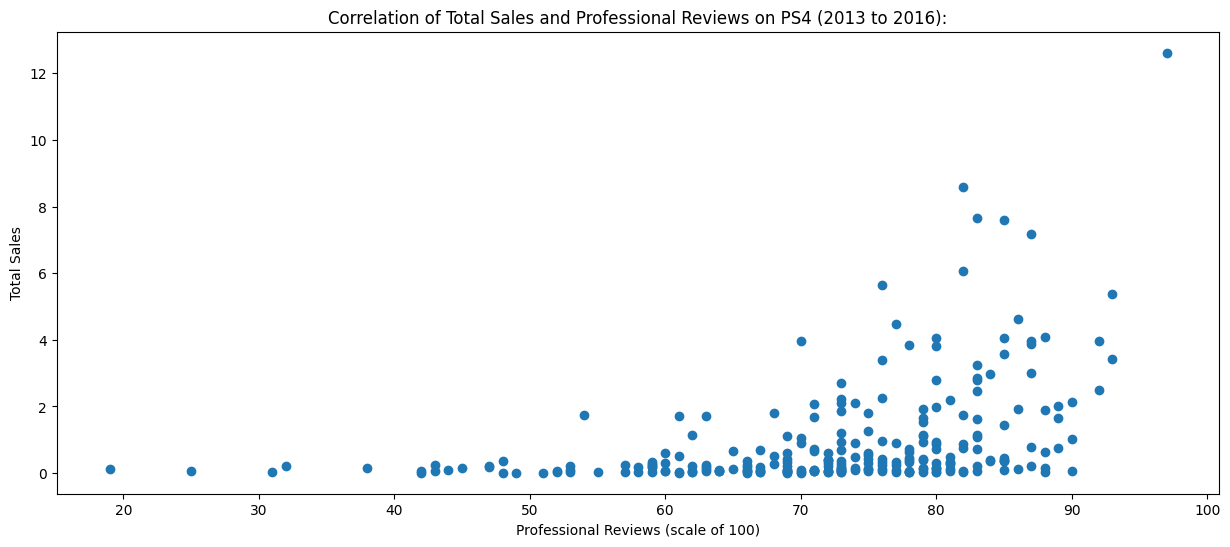

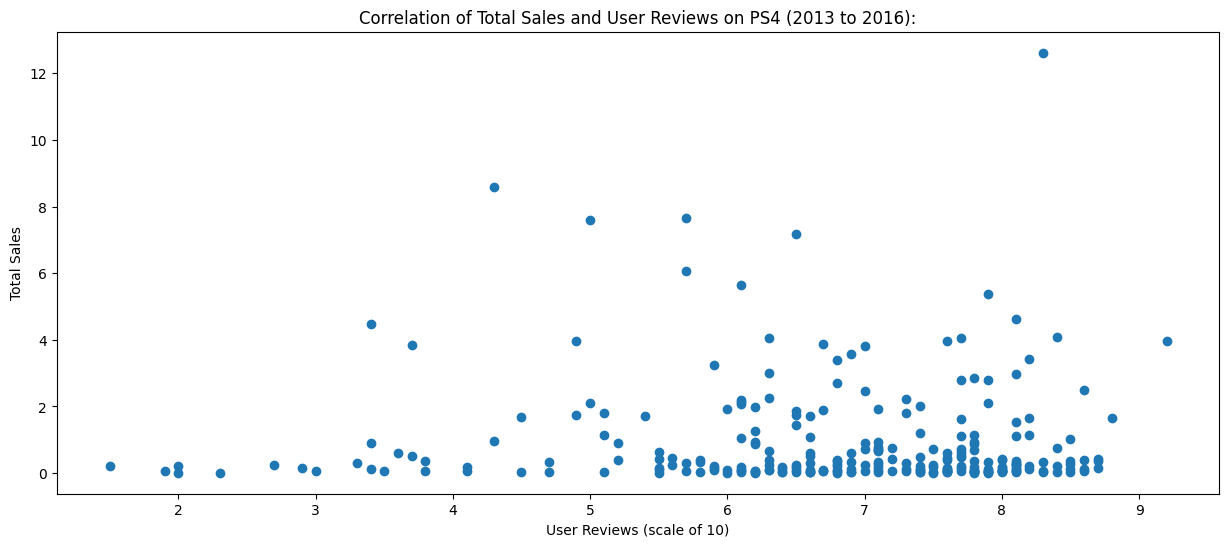

In [28]:
# Scatter plot for critic_score
plt.figure(figsize=(15, 6))
plt.scatter(games_ps4['critic_score'], games_ps4['total_sales'])
plt.title(
    'Correlation of Total Sales and Professional Reviews on PS4 (2013 to 2016):')
plt.xlabel('Professional Reviews (scale of 100)')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot for user_score
plt.figure(figsize=(15, 6))
plt.scatter(games_ps4['user_score'], games_ps4['total_sales'])
plt.title('Correlation of Total Sales and User Reviews on PS4 (2013 to 2016):')
plt.xlabel('User Reviews (scale of 10)')
plt.ylabel('Total Sales')
plt.show()

In [29]:
# Correlation between the total sales and reviews
ps4_sales_critic_score = games_ps4['total_sales'].corr(games_ps4['critic_score'])
ps4_sales_user_score = games_ps4['total_sales'].corr(games_ps4['user_score'])

# Print data
print(f'Correlation between total sales and professional reviews on the PS4 platform: {
      ps4_sales_critic_score:.2f}')
print()
print(f'Correlation between total sales and user reviews on the PS4 platform: {
      ps4_sales_user_score:.2f}')

Correlation between total sales and professional reviews on the PS4 platform: 0.41

Correlation between total sales and user reviews on the PS4 platform: -0.03


<div style="color: #196CC4;">
<b>RESULTS ANALYSIS: </b><br>
▶ Observing the average ratings from professionals and users with their respective scales, there is a notable similarity between the two. The professional score is 72/100, while the user score is 6.7/10. This similarity is also evident in the scatter plots.<br>
▶ On the other hand, there is a normal correlation between professional reviews and sales (coefficient of 0.41). This indicates that the higher the professional review score, the more likely it is that sales will be higher, and vice versa.<br>
▶ In contrast, the correlation between user reviews and sales is lower (coefficient of -0.03). This suggests that user reviews have a weaker influence on PS4 sales compared to professional reviews.
</div>

### Genre Distribution


<div style="color: #196CC4;">
▶ The following shows the general distribution and profitability of games by genre.
</div>

In [30]:
# Total platforms
total_genres = games['genre'].nunique()
print("Total number of genres across the decades:")

print(total_genres)
print()

# Platforms ranking with top sales from 1980 to 2016
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Platforms ranking with top sales from 2013 to 2016
new_genre_sales = new_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

Total number of genres across the decades:
12



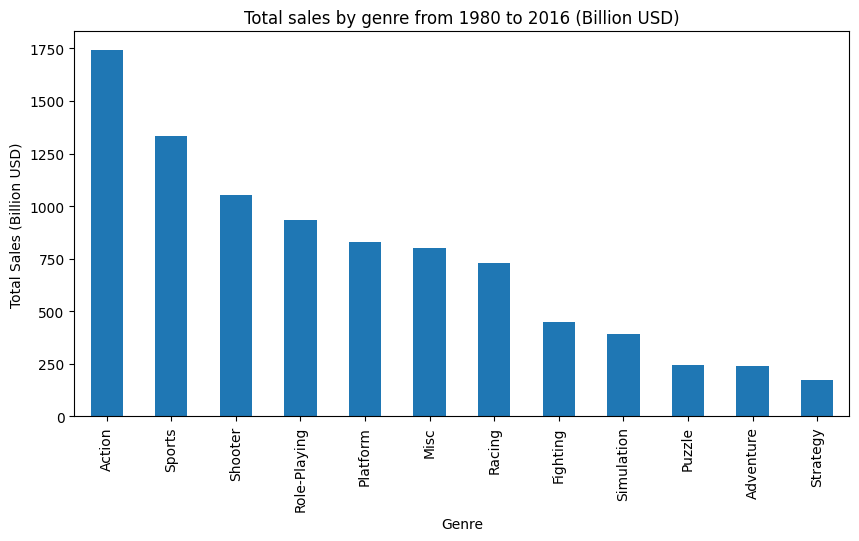

In [31]:
# Bar graph creation
genre_sales.plot(
    x='genre',
    kind='bar',
    stacked=True,
    title='Total sales by genre from 1980 to 2016 (Billion USD)',
    xlabel='Genre',
    ylabel='Total Sales (Billion USD)',
    figsize=[10, 5])

plt.show()

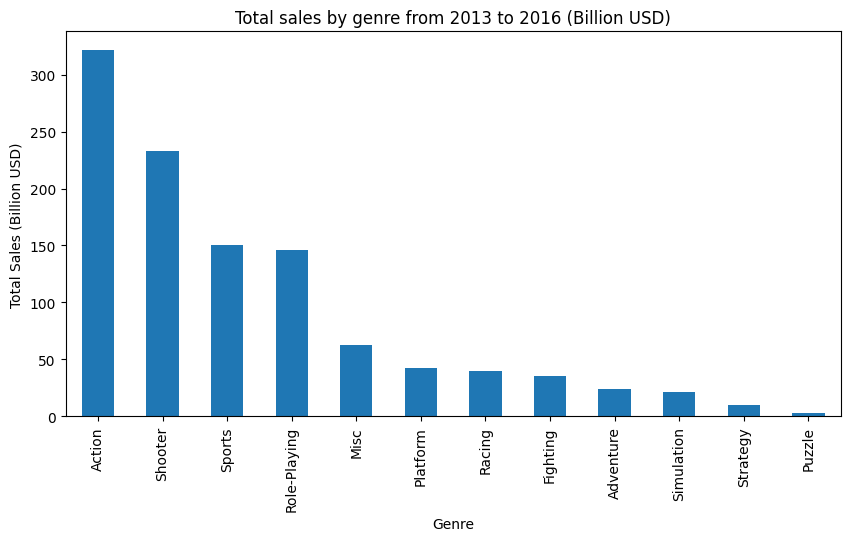

In [32]:
# Bar graph creation
new_genre_sales.plot(
    x='genre',
    kind='bar',
    stacked=True,
    title='Total sales by genre from 2013 to 2016 (Billion USD)',
    xlabel='Genre',
    ylabel='Total Sales (Billion USD)',
    figsize=[10, 5])

plt.show()

<div style="color: #196CC4;">
<b>RESULTS ANALYSIS (2013 to 2016): </b><br>
▶ It is observed that the video game genres generating the highest sales are Action, Shooter, and Sports. <br>
▶ The most profitable genre is Action, which has a significant lead over other genres, demonstrating that it is particularly popular among users.<br>
▶ There are also genres with lower sales such as Simulation, Strategy, and Puzzle, which are at the bottom of the list; these genres might not have the same widespread demand as others.<br> 
</div>


-----

## User Profile for Each Region


### Main Platforms

<div style="color: #196CC4;">
▶ Below are the platforms with the highest market shares for the different geographic regions: North America, Europe, and Japan.
</div>

In [33]:
# Platforms ranking with top sales per zone
na_platform_sales = new_games.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)
#na_platform_sales = new_games[new_games['year_of_release'].groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)
na_platform_sales = na_platform_sales.head(5)

eu_platform_sales = new_games.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False)
#eu_platform_sales = new_games[new_games['year_of_release'].groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False)
eu_platform_sales = eu_platform_sales.head(5)

jp_platform_sales = new_games.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False)
#jp_platform_sales = new_games[new_games['year_of_release'].groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False)
jp_platform_sales = jp_platform_sales.head(5)

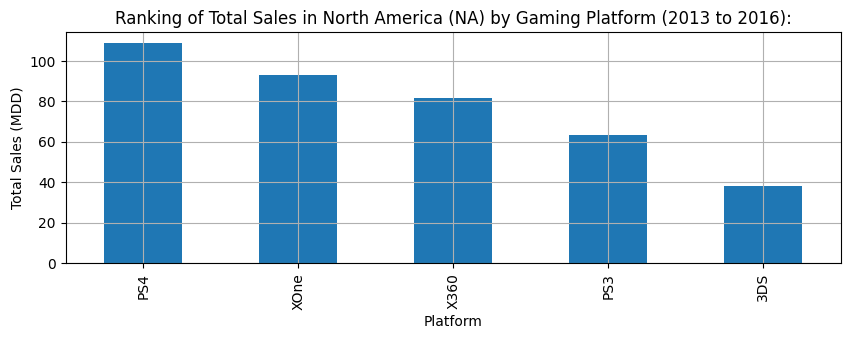

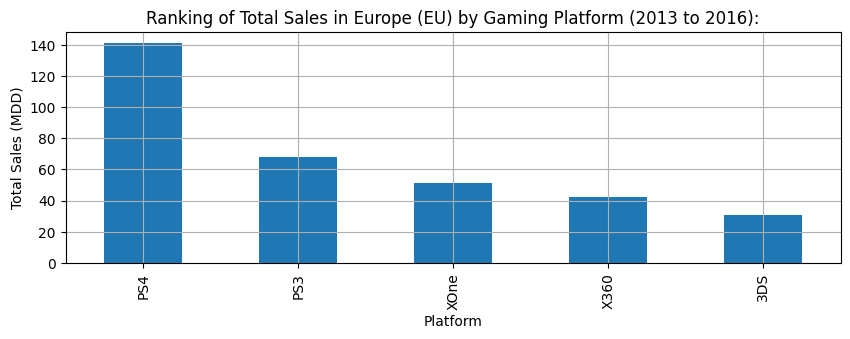

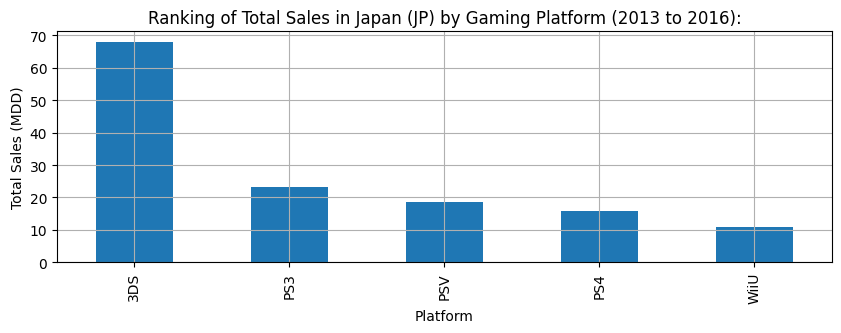

In [34]:
# NA - Bar graph creation
na_platform_sales.plot(
    kind='bar',
    grid=True,
    x='platform',
    title='Ranking of Total Sales in North America (NA) by Gaming Platform (2013 to 2016):',
    xlabel='Platform',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.show()

# EU - Bar graph creation
eu_platform_sales.plot(
    kind='bar',
    grid=True,
    x='platform',
    title='Ranking of Total Sales in Europe (EU) by Gaming Platform (2013 to 2016):',
    xlabel='Platform',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.show()

# JP - Bar graph creation
jp_platform_sales.plot(
    kind='bar',
    grid=True,
    x='platform',
    title='Ranking of Total Sales in Japan (JP) by Gaming Platform (2013 to 2016):',
    xlabel='Platform',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.show()

<div style="color: #196CC4;">
<b>ANALYSIS</b><br>
Based on the previous graphs, there are particularities in platform preferences by users from one geographic region to another within the range of years 2013 to 2016:<br><br>
▶ The top 3 platforms for each region are PS4 (North America and Europe) and 3DS (Japan), respectively.
<ul>
    <li>North America: PS4 is the most popular platform, followed by XOne and X360.</li>
    <li>Europe: PS4 leads, followed by PS3 and XOne.</li>
    <li>Japan: The most used platform is 3DS, followed by PS3 and PSV.</li>
</ul>
▶ North America and Europe share the same platforms, although not in the same order.<br>
▶ Japan shows a preference for PSV and WiiU, platforms not found in the rankings of the other two regions.
</div>


### Genre Ratings

<div style="color: #196CC4;">
▶ Below are the genres with the highest market shares for different geographic regions: North America, Europe, and Japan.
</div>


In [35]:
# Genres ranking with top sales per zone

na_genre_sales = new_games.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False)
#na_genre_sales = games[games['year_of_release'].isin(new_games)].groupby(['genre'])['na_sales'].sum().sort_values(ascending=False)
na_genre_sales = na_genre_sales.head(5)

eu_genre_sales = new_games.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False)
#eu_genre_sales = games[games['year_of_release'].isin(new_games)].groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False)
eu_genre_sales = eu_genre_sales.head(5)

jp_genre_sales = new_games.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False)
#jp_genre_sales = games[games['year_of_release'].isin(new_games)].groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False)
jp_genre_sales = jp_genre_sales.head(5)

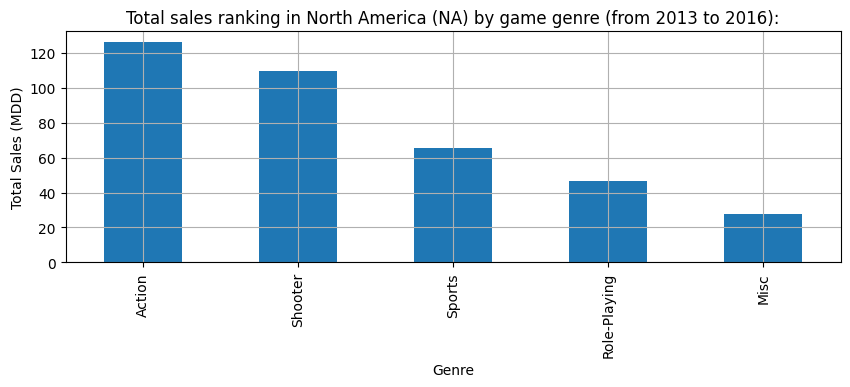

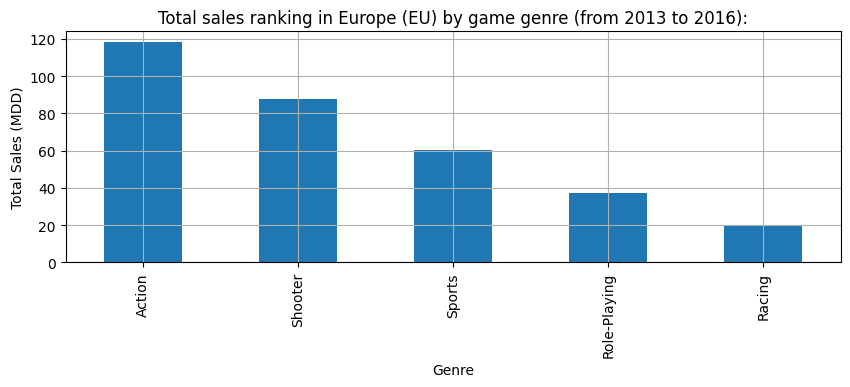

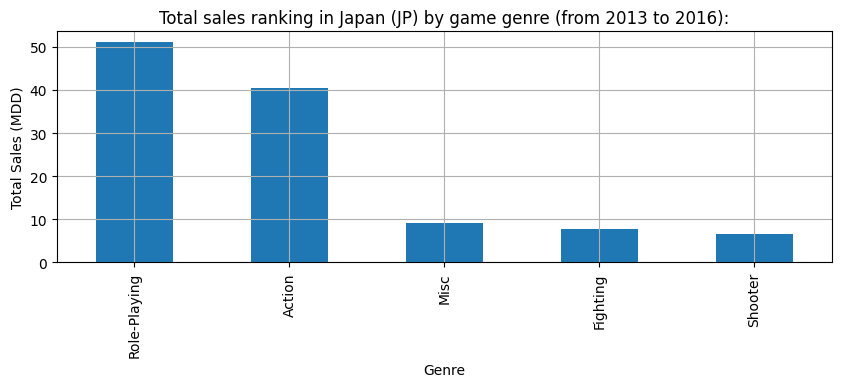

In [41]:
# NA - Bar graph creation
na_genre_sales.plot(
    kind='bar',
    grid=True,
    x='genre',
    title='Total sales ranking in North America (NA) by game genre (from 2013 to 2016):',
    xlabel='Genre',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.show()

# EU - Bar graph creation
eu_genre_sales.plot(
    kind='bar',
    grid=True,
    x='genre',
    title='Total sales ranking in Europe (EU) by game genre (from 2013 to 2016):',
    xlabel='Genre',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.show()

# JP - Bar graph creation
jp_genre_sales.plot(
    kind='bar',
    grid=True,
    x='genre',
    title='Total sales ranking in Japan (JP) by game genre (from 2013 to 2016):',
    xlabel='Genre',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.show()

<div style="color: #196CC4;">
<b>ANALYSIS</b><br>
Based on the previous graphs, particularities in the preference for video game genres by users from one geographic area to another within the range of years from 2013 to 2016 are observed.<br><br>
▶ The top 3 genres for each area are 'Action' (North America and Europe) and 'Role-Playing' (Japan) respectively.
<ul>
    <li>North America: Action is the most popular genre, followed by Shooters and Sports.</li>
    <li>Europe: Action is the most popular genre, followed by Shooters and Sports.</li>
    <li>Japan: The preferred genre is Role-Playing, followed by Action and Misc.</li>
</ul>
▶ There are predominant genres that coincide across all areas: 'Action', 'Shooter', and 'Role-Playing'.<br>
▶ Japan has a particular preference for the genres 'Fighting' and 'Misc'.<br>
</div>


### ESRB Ratings

<div style="color: #196CC4;">
▶ The following shows the ESRB (Entertainment Software Rating Board) ratings with the highest market shares for different geographic areas: North America, Europe, and Japan.<br>
▶ This rating is the video game rating board in North America. This system provides information on the appropriate age to play specific games based on their content. 
    <ul>
        <li>Everyone (E) - For all</li>
        <li>Everyone 10+ (E10+) - Ages 10 and up</li>
        <li>Teen (T) - Teenagers</li>
        <li>Mature (M) - Adults</li>
        <li>Adults Only (AO) - Adults only</li>
    </ul>
</div>


In [37]:
# Rating ranking with top sales per zone

na_rating_sales = new_games.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
#na_rating_sales = games[games['year_of_release'].isin(new_games)].groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
na_rating_sales = na_rating_sales.head(5)

eu_rating_sales = new_games.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
#eu_rating_sales = games[games['year_of_release'].isin(new_games)].groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
eu_rating_sales = eu_rating_sales.head(5)

jp_rating_sales = new_games.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
#jp_rating_sales = games[games['year_of_release'].isin(new_games)].groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
jp_rating_sales = jp_rating_sales.head(5)

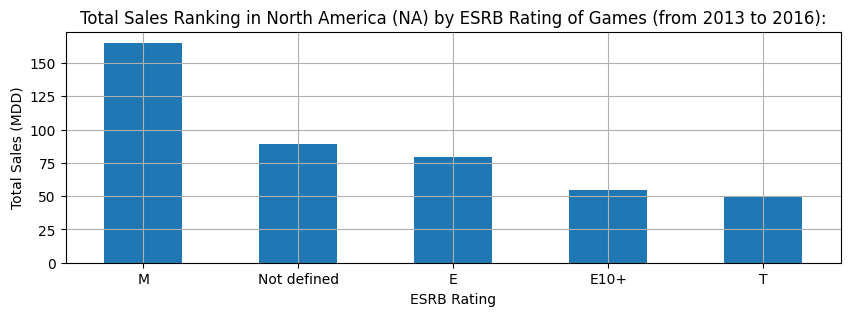

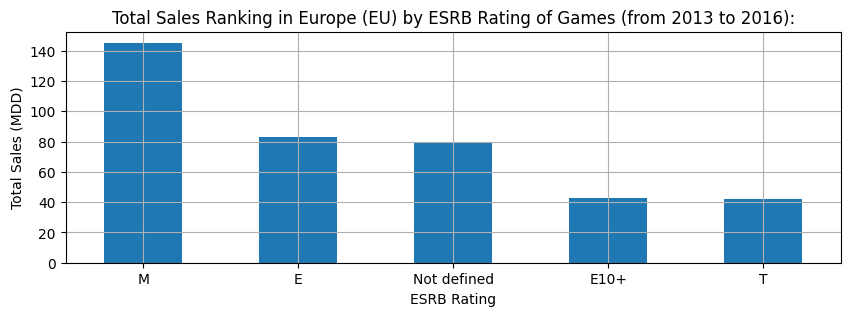

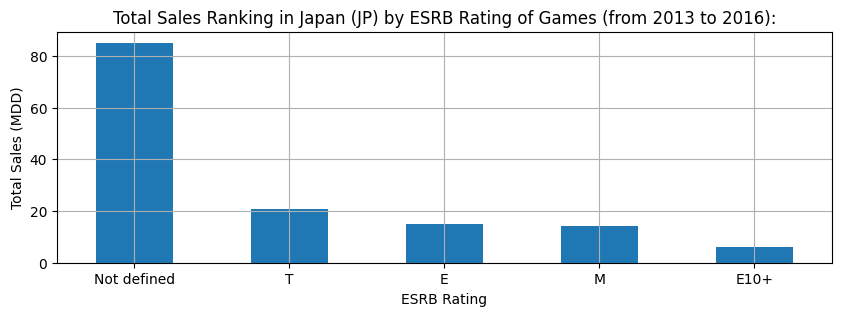

In [42]:
# NA - Bar graph creation
na_rating_sales.plot(
    kind='bar',
    grid=True,
    x='rating',
    title='Total Sales Ranking in North America (NA) by ESRB Rating of Games (from 2013 to 2016):',
    xlabel='ESRB Rating',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.xticks(rotation=360)
plt.show()

print()

# EU - Bar graph creation
eu_rating_sales.plot(
    kind='bar',
    grid=True,
    x='rating',
    title='Total Sales Ranking in Europe (EU) by ESRB Rating of Games (from 2013 to 2016):',
    xlabel='ESRB Rating',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.xticks(rotation=360)
plt.show()

print()

# JP - Bar graph creation
jp_rating_sales.plot(
    kind='bar',
    grid=True,
    x='rating',
    title='Total Sales Ranking in Japan (JP) by ESRB Rating of Games (from 2013 to 2016):',
    xlabel='ESRB Rating',
    ylabel='Total Sales (MDD)',
    figsize=[10, 3])
plt.xticks(rotation=360)
plt.show()

<div style="color: #196CC4;">
<b>ANALYSIS</b><br>
Based on the previous charts, particularities in the preference for game ratings by users from one geographic area to another within the range of 2013 to 2016 can be observed.<br><br>
▶ The 3 predominant ratings for each area are 'Mature (M) - Adults' (North America and Europe) and 'Not defined' (Japan) respectively. <em>(*It appears that there is a large number of games with no rating).</em>
<ul>
    <li>North America: Mature (M) - Adults, Not defined, and Everyone (E) - For All.</li>
    <li>Europe: Mature (M) - Adults, Everyone (E) - For All, and Not defined.</li>
    <li>Japan: Not defined, Teen (T) - Teenagers, and Everyone (E) - For All.</li>
</ul>
▶ Again, Japan has a particularity with the ratings; its list is led by those games that have no rating, and there is a large difference in sales compared to other ratings in this country.
</div>


-----

## Hypothesis Testing


### Ratings by Platform


<p style="color:#196CC4">
    <b>STATEMENT</b><br>
    <b>Initial business hypothesis:</b> "The average user ratings for Xbox One and PC platforms are the same".<br><br>
    Based on this initial hypothesis, the analysis will be conducted with the following information (for consistency, the null hypothesis is based on equality).<br>
    <b>▶ Null hypothesis (matches business hypothesis):</b> "The average user ratings for Xbox One and PC platforms are the same".<br> 
    <b>▶ Alternative hypothesis:</b> "The average user ratings for Xbox One and PC platforms are different".<br><br>
</p>


<p style="color:#196CC4">
    <b>T-TEST:</b><br>
    The selection of the two-sample t-test is appropriate because we want to compare the average user ratings of two independent groups of gaming platforms: Xbox One and PC.<br><br>
</p>


In [44]:
# Remove NaN
#games['user_score'].fillna(0, inplace=True)
games['user_score'].dropna(inplace=True)

# Sample definition
user_score_xbox = new_games[new_games['platform'] == 'XOne']['user_score']
user_score_pc = new_games[new_games['platform'] == 'PC']['user_score']
#user_score_xbox = games[(games['platform'] == 'XOne') & (games['year_of_release'].isin(new_games))]['user_score']
#user_score_pc = games[(games['platform'] == 'PC') & (games['year_of_release'].isin(new_games))]['user_score']

# Remove NaN
user_score_xbox = user_score_xbox.dropna()
user_score_pc = user_score_pc.dropna()

# test t
t_stat, p_value = stats.ttest_ind(user_score_xbox, user_score_pc, equal_var=False)

# Display data
print("Alpha value: 0.05")
print("t value:", t_stat)
print("p value:", p_value)


# Hypothesis evaluation
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected: There is a significant difference between the average user ratings for Xbox One and PC.")
else:
    print("The null hypothesis cannot be rejected: There is not enough evidence to conclude that there is a significant difference between the average user ratings for Xbox One and PC.")

Alpha value: 0.05
t value: 1.45192815744488
p value: 0.14759594013430463
The null hypothesis cannot be rejected: There is not enough evidence to conclude that there is a significant difference between the average user ratings for Xbox One and PC.


<p style="color:#196CC4">
   <b>ALPHA VALUE:</b>
<br>
    The most commonly used value is 0.05, which represents a 5% probability of making an error.<br>
<br> 
    <b>RESULTS ANALYSIS (2013 to 2016): </b>
<br>
    The p-value is 0.147..., which is greater than the alpha value, indicating that we cannot reject the null hypothesis (also the initial business hypothesis); this means "there is no significant difference between the average user ratings for Xbox One and PC."
</p>

### Ratings by Genre

<p style="color:#196CC4">
    <b>STATEMENT</b>
<br>
    <b>Initial business hypothesis:</b> "The average user ratings for the Action and Sports genres are different".<br>
<br>
    Based on this initial hypothesis, the analysis will be carried out with the following information (for consistency, the null hypothesis is based on equality).<br>
    <b>▶ Null hypothesis:</b> "The average user ratings for the Action and Sports genres are the same".<br> 
    <b>▶ Alternative hypothesis (matches business hypothesis):</b> "The average user ratings for the Action and Sports genres are different".<br>
<br>
</p>

<p style="color:#196CC4">
    <b>T-TEST:</b>
<br>
    The selection of the two-sample t-test is appropriate because we want to compare the average user ratings of two independent groups of game genres: "Action" and "Sports". <br>
<br>
</p>

In [45]:
# Sample definition
#user_score_action = games[(games['genre'] == 'Action') & (games['year_of_release'].isin(new_games))]['user_score']
#user_score_sports = games[(games['genre'] == 'Sports') & (games['year_of_release'].isin(new_games))]['user_score']
user_score_action = new_games[new_games['genre'] == 'Action']['user_score']
user_score_sports = new_games[new_games['genre'] == 'Sports']['user_score']

# Remove NaN
user_score_action = user_score_action.dropna()
user_score_sports = user_score_sports.dropna()

# test t
t_stat, p_value = stats.ttest_ind(user_score_action, user_score_sports, equal_var=False)

# Display data
print("Alpha value: 0.05")
print("T value:", t_stat)
print("P value:", p_value)

# Hypothesis evaluation
alpha = 0.05
if p_value < alpha:
    print("Null hypothesis rejected: The average user ratings for Action and Sports genres are different.")
else:
    print("Cannot reject the null hypothesis: There is not enough evidence to conclude that the average user ratings for Action and Sports genres are different.")

Alpha value: 0.05
T value: 10.233428417448625
P value: 1.4460039700704318e-20
Null hypothesis rejected: The average user ratings for Action and Sports genres are different.


<p style="color:#196CC4">
   <b>ALPHA VALUE:</b><br>
    The most commonly used value is 0.05, which represents a 5% probability of making an error.<br><br> 
    <b>RESULTS ANALYSIS (range of years 2013 to 2016): </b><br>
    The p value is 1.446..., which is greater than the alpha value. This validates that "the average user ratings for Action and Sports genres are different," leaning positively towards the alternative and initial business hypothesis.
</p>


-----

## Conclusions

<div style="color:#196CC4">
<ul>
<li><b>Video Game Releases by Year</b><br>
Throughout the decades, the evolution of video game releases has been observed, and it would be interesting to complement this analysis with the emergence of other technologies and how these video games on platforms gradually evolve to other devices that are more prevalent today.</li>
<li><b>Platform Trends</b><br>
It has been interesting to observe the life cycle of video game platforms over the years and how the industry has shifted from launching a single platform to competing with several innovations simultaneously. It's important to consider that this pattern in the life cycle of platforms may not always be the same; later, new devices, technologies, or the mass emergence of a wide variety of possibilities in the world of video games could lead to new behavioral patterns.</li>
<li><b>Video Game Sales by Genre</b><br>
Action, sports, and shooter games are the most popular and profitable, while strategy, puzzle, and simulation games may not be as dominant in terms of sales.</li>
<li><b>Correlation of Reviews and Video Game Sales</b><br>
Professional reviews often carry more weight in consumers' purchasing decisions.</li>
<li><b>Video Game Platforms by Region</b><br>
Platform preference varies significantly between regions, and while some platforms are universal, others are more region-specific. This information is crucial for understanding the market and directing game launch and marketing strategies.</li>
<li><b>Video Game Genres by Region</b><br>
Summarizing genre preferences, while 'Action', 'Shooter', and 'Sports' are consistently popular in North America and Europe, 'Role-Playing' has a clear dominance in Japan.</li>
<li><b>Video Game Ratings by Region</b><br>
Regarding ratings, while 'Everyone (E) - All Ages' and 'Mature (M) - Adults' are consistently popular in North America and Europe, the rating 'Not defined' has a clear dominance in Japan. It would also be interesting to learn more about the criteria considered for video game ratings and why there is a large number of them without labeling.</li>
</ul>
</div>
